# Описание проекта

## Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1.  выделить целевые группы клиентов;
    2.  предложить меры по снижению оттока;
    3.  определить другие особенности взаимодействия с клиентами.
    

## <a href='#Шаг 1'> Шаг 1. Загрузите данные</a>


«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

## <a href='#Шаг 2'> Шаг 2. Проведите исследовательский анализ данных (EDA)</a>

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.

## <a href='#Шаг 3'> Шаг 3. Постройте модель прогнозирования оттока клиентов</a>

- Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:
    1. логистической регрессией,
    2. случайным лесом.
    
Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

## <a href='#Шаг 4'> Шаг 4. Сделайте кластеризацию клиентов</a>

Стандартизируйте данные.

- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

## <a href='#Шаг 5'> Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</a>


Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.


<a id='Шаг 1'></a>
## Шаг 1. Загрузим данные

In [1]:
# Имортируем необходимые библиотеки для исследования 
import pandas as pd
import numpy as np

from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# загружаем файл и смотрим на название столбцов
fc = pd.read_csv('/datasets/gym_churn.csv')
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
# приводим название столбцов к нижнему регистру
fc.columns = fc.columns.str.lower()
fc.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3713,1,0,0,0,1,1,1,29,76.528331,1.0,15,1.892966,1.971986,0
2847,0,1,0,0,1,1,0,26,9.838696,1.0,0,2.278903,1.929182,1
1023,0,1,0,0,1,12,0,33,267.472057,4.0,1,0.763265,0.824603,0
458,0,0,0,0,1,1,0,27,45.921371,1.0,1,1.301955,0.937431,1
1259,0,1,0,0,1,1,0,27,188.713126,1.0,0,0.485315,0.505336,1


# Вывод

- Импортировали необходимые библиотеки
- Загрузили и прочитали данные
- Привели названия столбцов к нижнему регистру

<a id='Шаг 2'></a>
# Шаг 2. Исследовательский анализ данных (EDA)

## Шаг 2.0. Изучим средние значения и стандартные отклонения

In [4]:
# Посмотрим на описательную статистику данных и траспонируем таблицу
fc.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### Вывод по описательной части:
- Пропущенных значений нет
- Типы данных выбраны верно
- Есть незначительные выбросы в признаках "lifetime" и "avg_additional_charges_total"

##  Шаг 2.1. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [5]:
#Транспонируем таблицу, переименуем столбцы, добавим вычисляемое поле, отсортируем
comparison = fc.groupby('churn').mean().T.reset_index().round(4)
comparison. columns = ['feature','no_churn', 'churn']
comparison['%'] = ((comparison['no_churn'] / comparison['churn'])-1).round(4)
comparison = comparison.sort_values(by='%', ascending = False)

#Форматирование таблицы
format_dict = {'no_churn': '{:.2f}','churn': '{:.2f}','%': '{:.1%}'}
comparison\
.style\
.format(format_dict)\
.hide_index()\
.background_gradient(subset=['%'], cmap='Blues')\
.set_properties(**{'width': '100px'})

feature,no_churn,churn,%
lifetime,4.71,0.99,375.6%
contract_period,5.75,1.73,232.5%
month_to_end_contract,5.28,1.66,217.8%
avg_class_frequency_current_month,2.03,1.04,94.2%
promo_friends,0.35,0.18,92.3%
group_visits,0.46,0.27,72.8%
partner,0.53,0.36,50.3%
avg_additional_charges_total,158.45,115.08,37.7%
avg_class_frequency_total,2.02,1.48,37.3%
near_location,0.87,0.77,13.7%


#### Влияние на вероятность оттока:
- Время в статусе клиента, длительность абонемента и срок до окончания абонемента  у оставшихся клиентов в несколько раз превышает показатели у ушедших клиентов
- Посещаемость оставшихся клиентов выше, чем у ушедших
- Корпоратиыне клиенты и посетители пришедшие по приглашению партнеров реже уходят 


## Шаг 2.2. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался

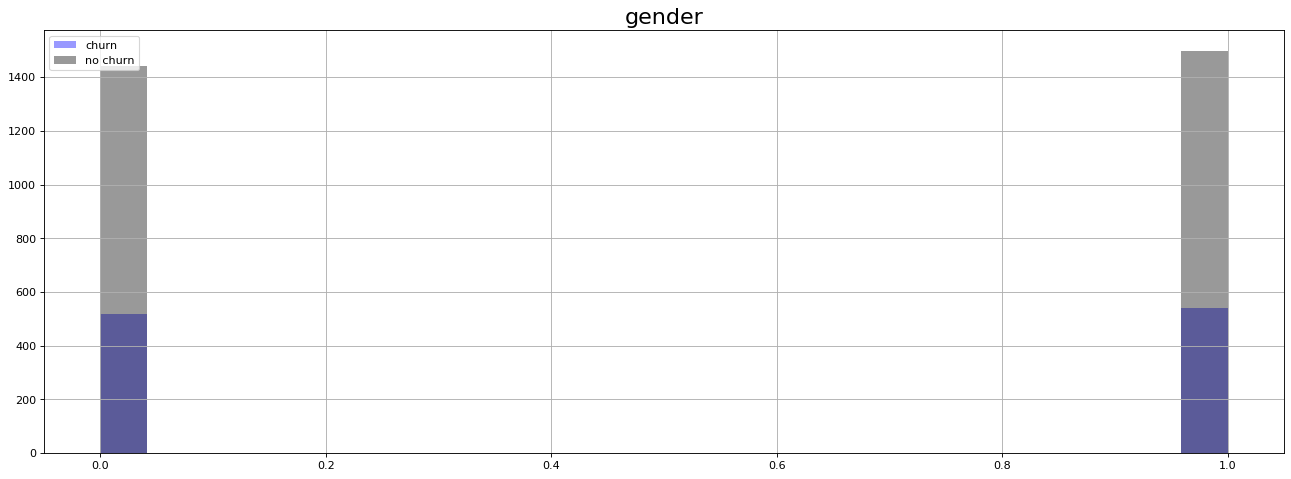

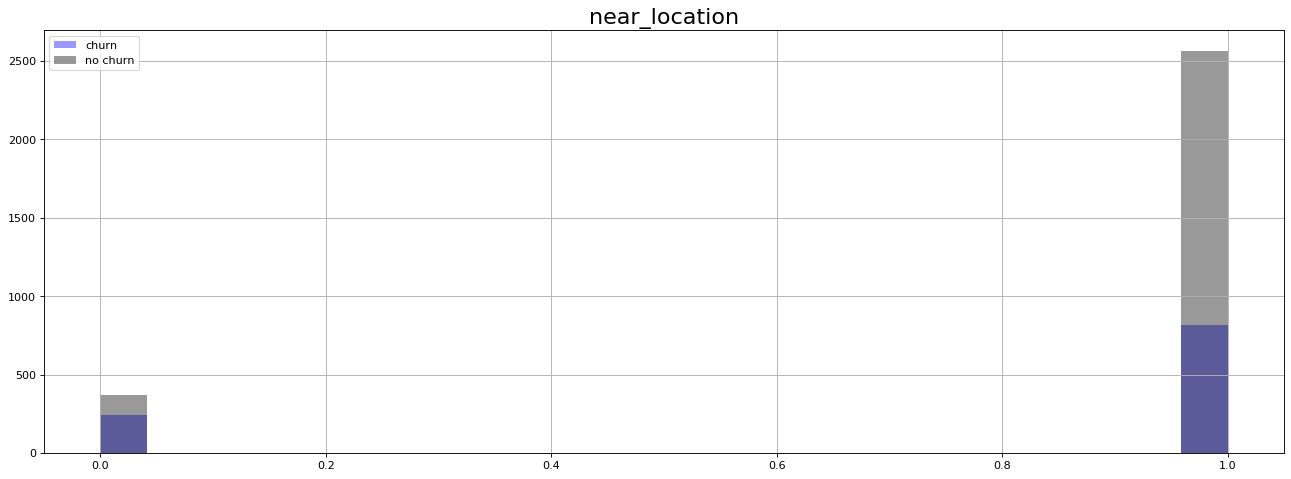

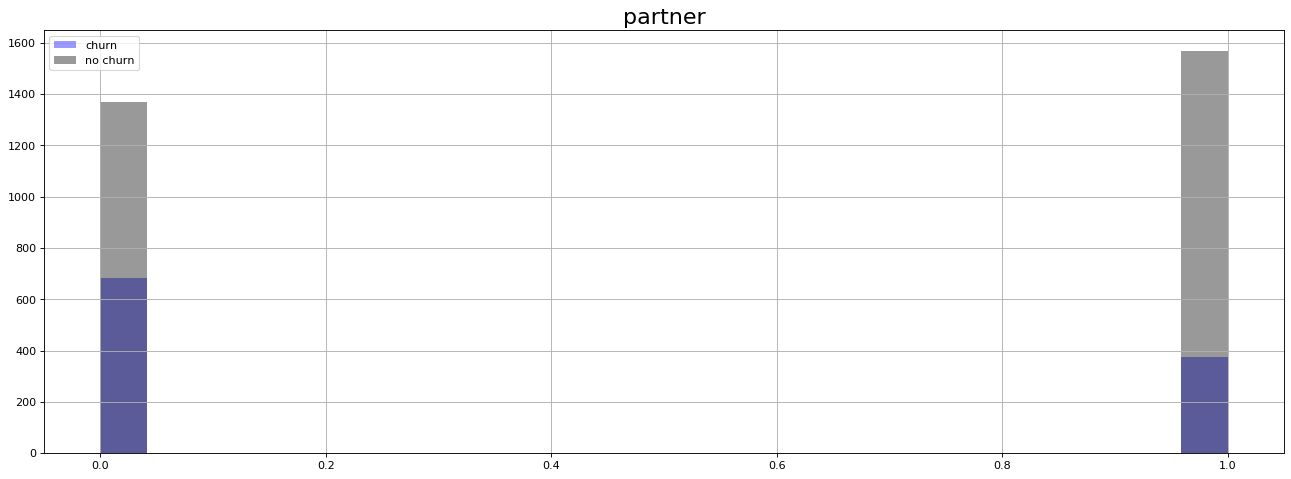

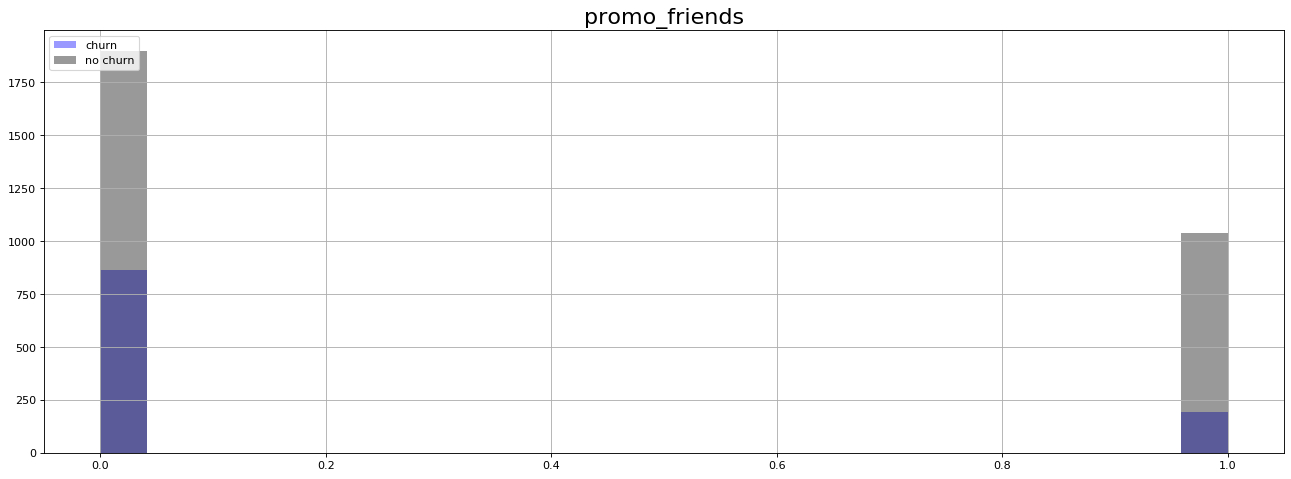

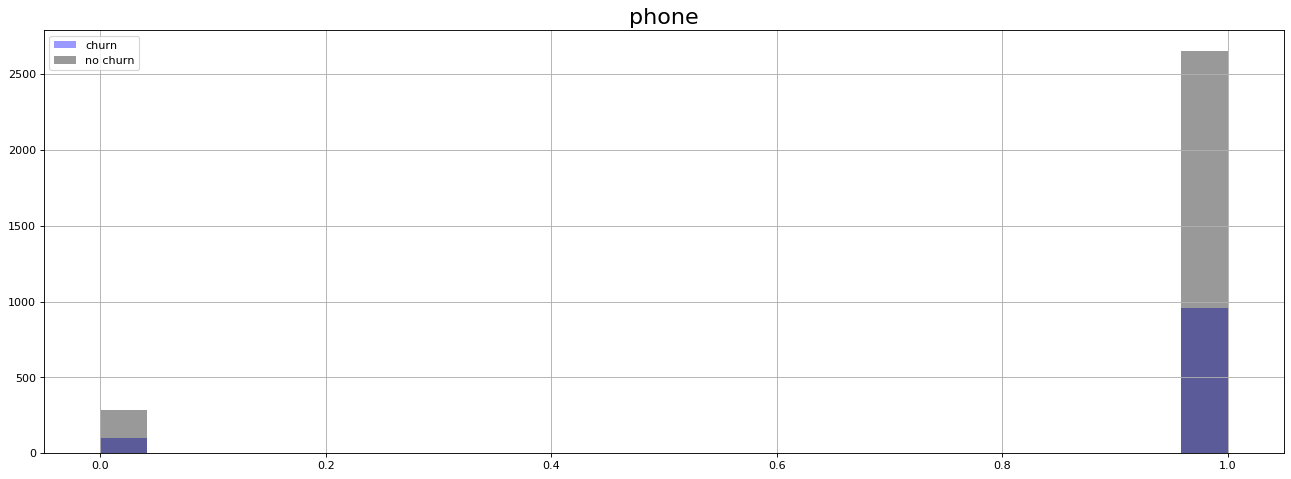

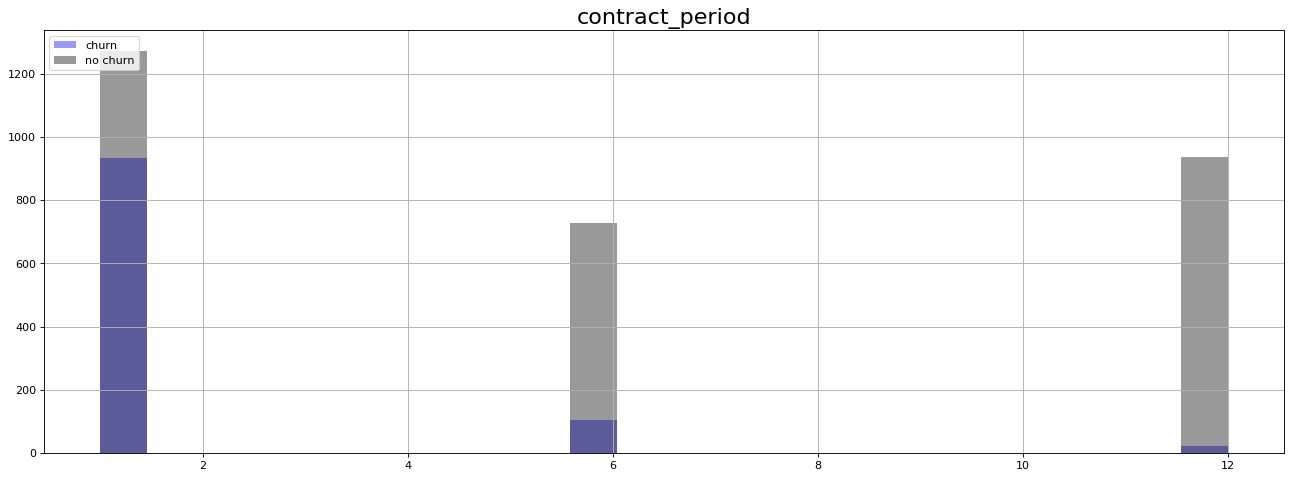

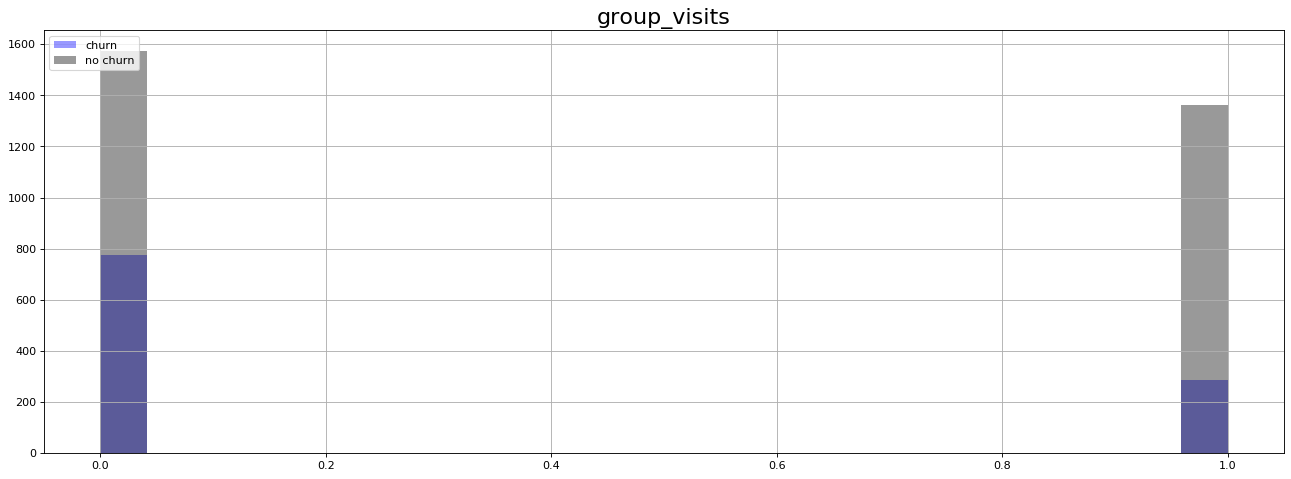

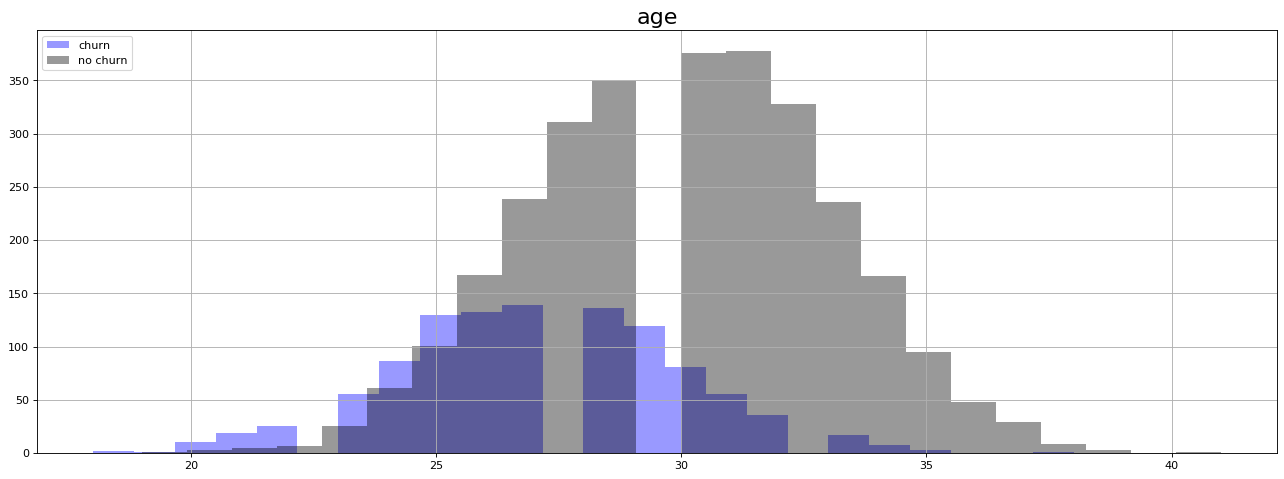

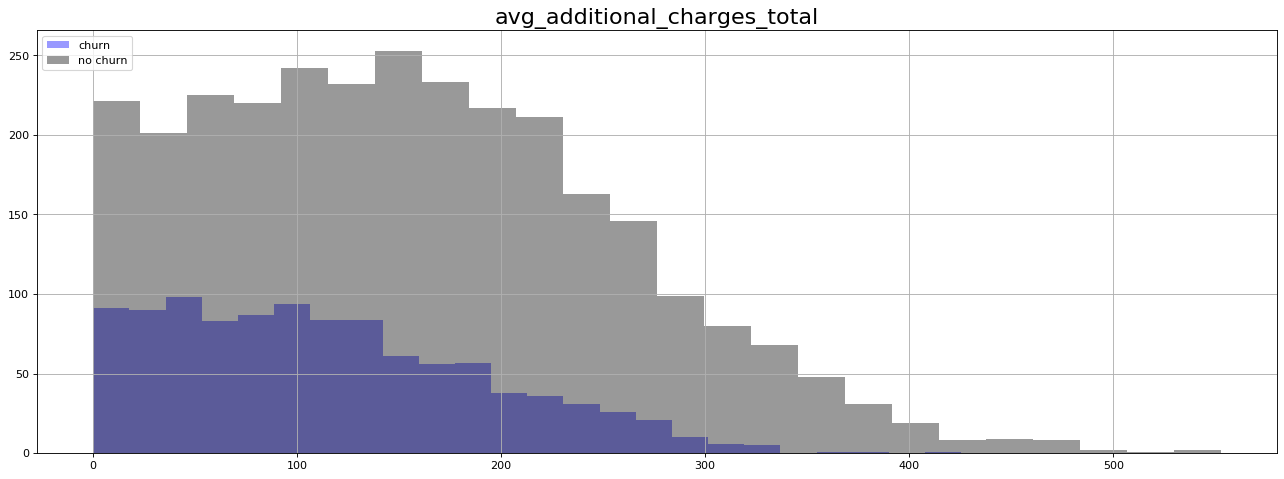

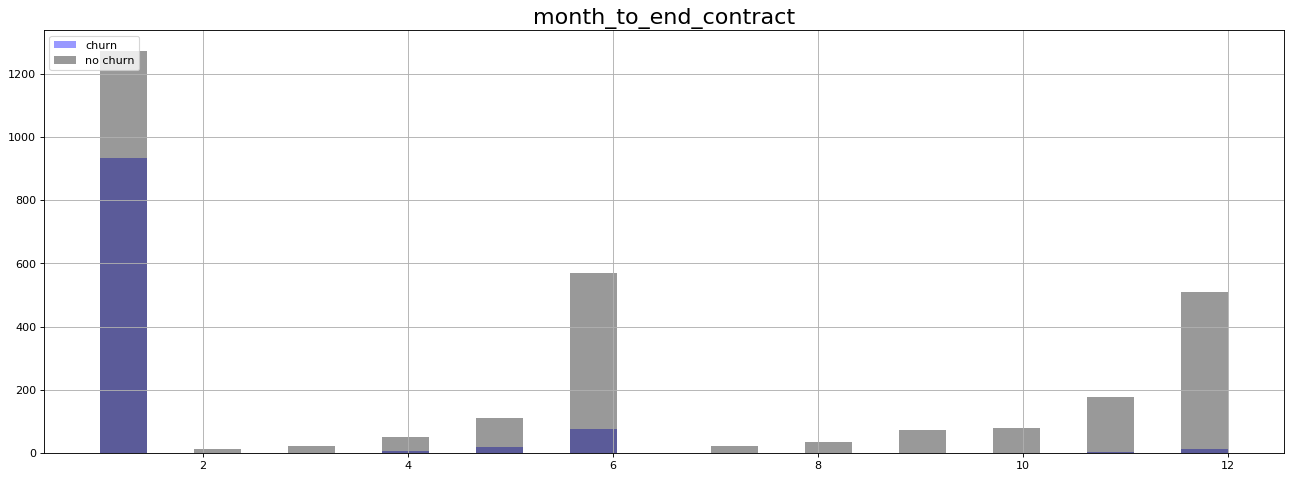

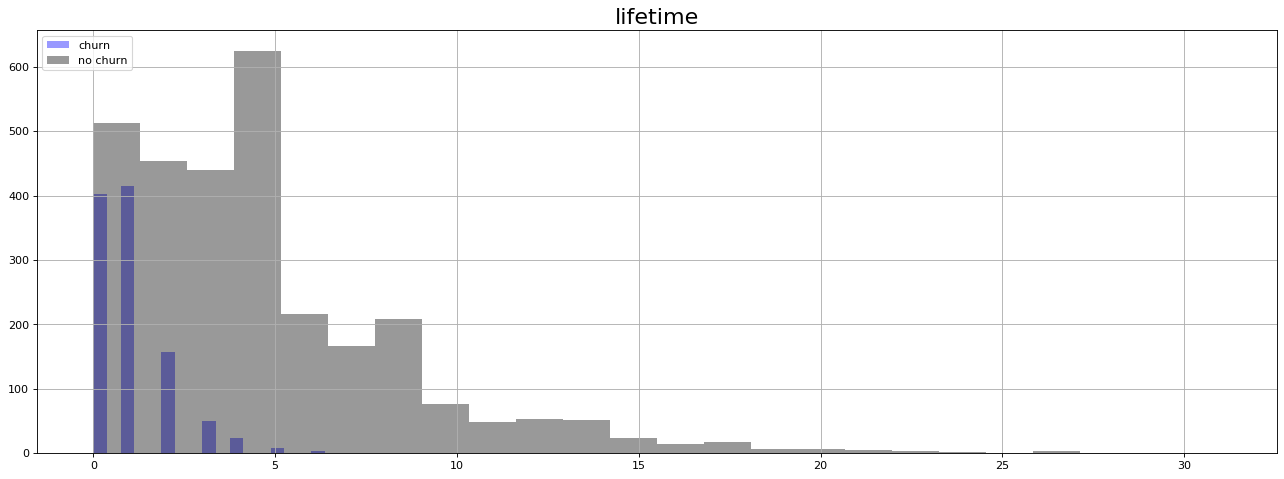

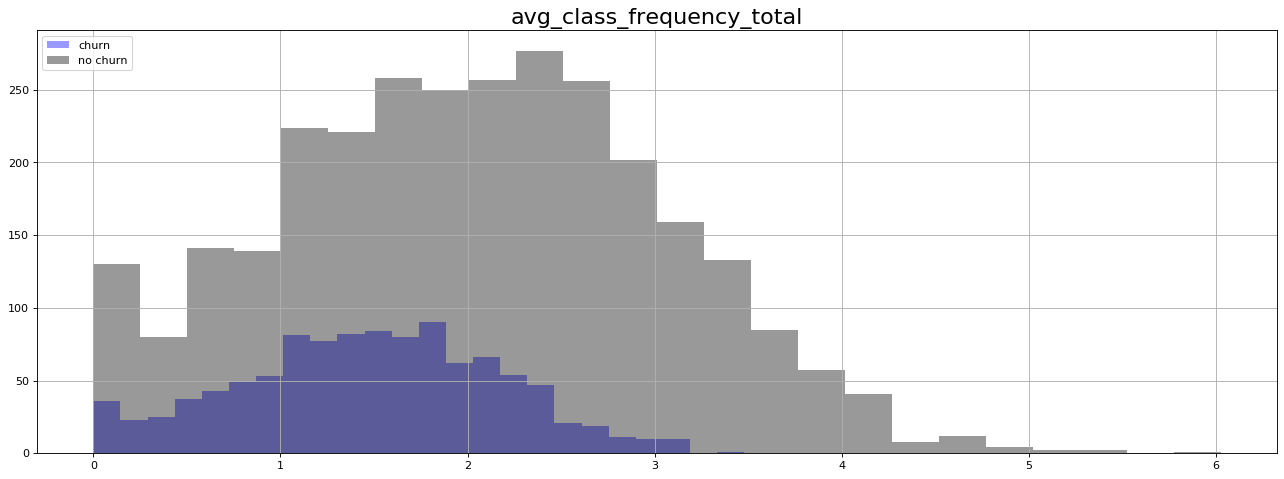

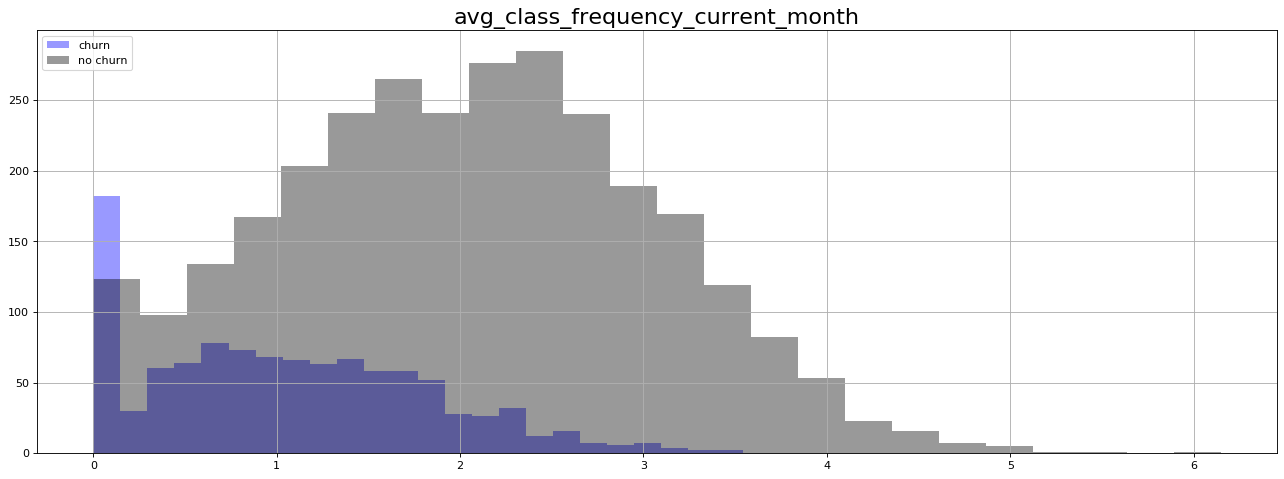

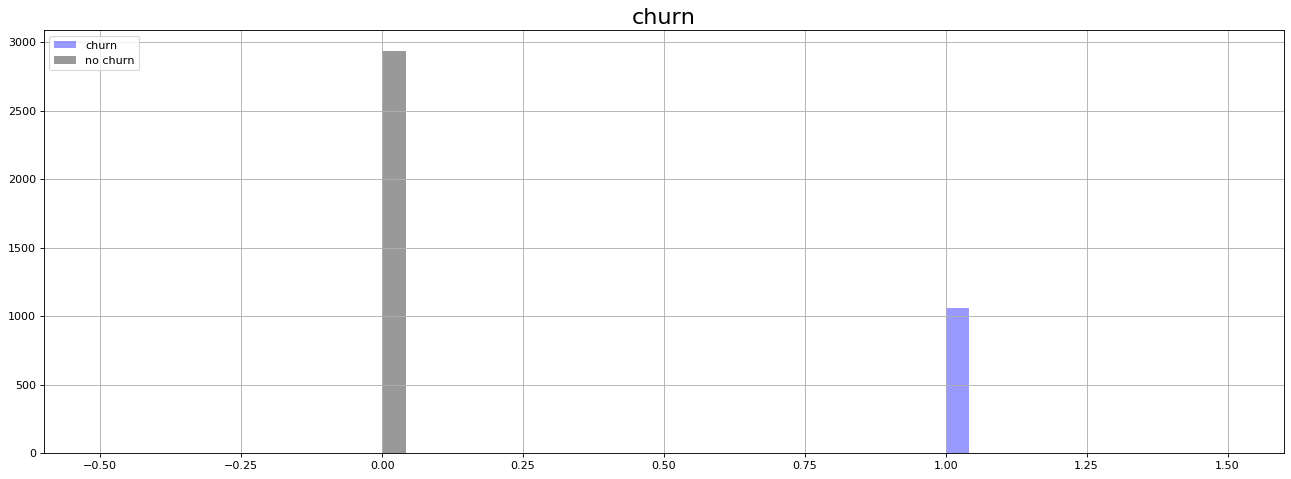

In [8]:
#Разбиваем данные на churn и нет
fc_1 = fc.query('churn == 1')
fc_0 = fc.query('churn == 0')

#Строим гистогамы через цикл
for feature in fc.columns:
    plt.figure(figsize=(20,7), dpi= 80)
    sns.distplot(fc_1[feature], bins = 24, kde = False, label="churn", color = 'blue')
    sns.distplot(fc_0[feature], bins = 24, kde = False, label="no churn", color = 'black')
    plt.legend(loc = 2)
    plt.grid()
    plt.title(feature, fontsize=20)
    plt.ylabel("")
    plt.xlabel("")
    plt.show() 

**Вероятность оттока тем ниже, чем выше:**
- Частота посещения зала в текущем месяце и за все время
- Время в статусе клиента
- Уровень дополнительных затрат клиента в фитнес-центре
- Возраст клиента

## Шаг 2.3. Построим матрицу корреляций

Text(0.5, 1, 'Correlation Matrix')

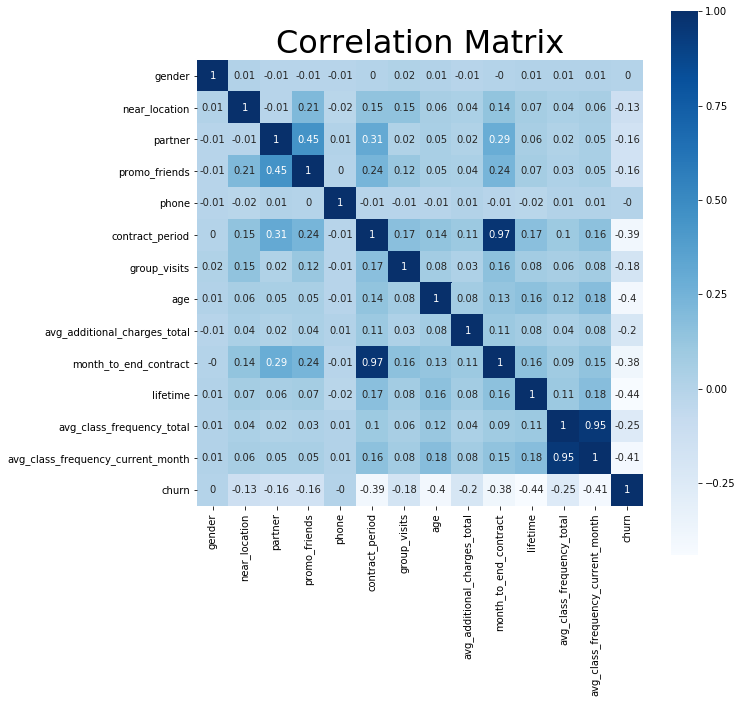

In [7]:
#Строим татрицу корреляций
corr_matrix = fc.corr().round(2)

#Формат heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True, square = True, cmap="Blues")
plt.title('Correlation Matrix', fontsize=32)

#### Коллинеарность:
Высокая (выше 0.95)
- Длительность контракта и экспирация
- Среднее кол-во посещений в неделю за все время контракта и в текущем месяце

Средняя (около 0.5)
- Статус партнера и приглешние друга по реферальной схеме

#### Влияние на отток:

Наиболее влияющие (от 0.38)
1. Длительность контракта
2. Возраст
3. Срок до окончания контракта
4. Общее время в статусе клиента
5. Среднее кол-во посещений в неделю с текущем месяце

Слабо влияющие признаки (до 0.25)
6. Территориальный признак 
7. Статус партнера
8. Пришел ли клиент по рефералу
9. Посещал ли группповые занятия
10. Выручка от дополнительных услуг
11. Среднее кол-во посещений в нед. за все время контракта

Не влияющие признаки (0)
12. Пол
13. Наличие контактного телефона

## Шаг 2.4.Подготовим данные для построения модели

Text(0.5, 1, 'Filtered Correlation Matrix')

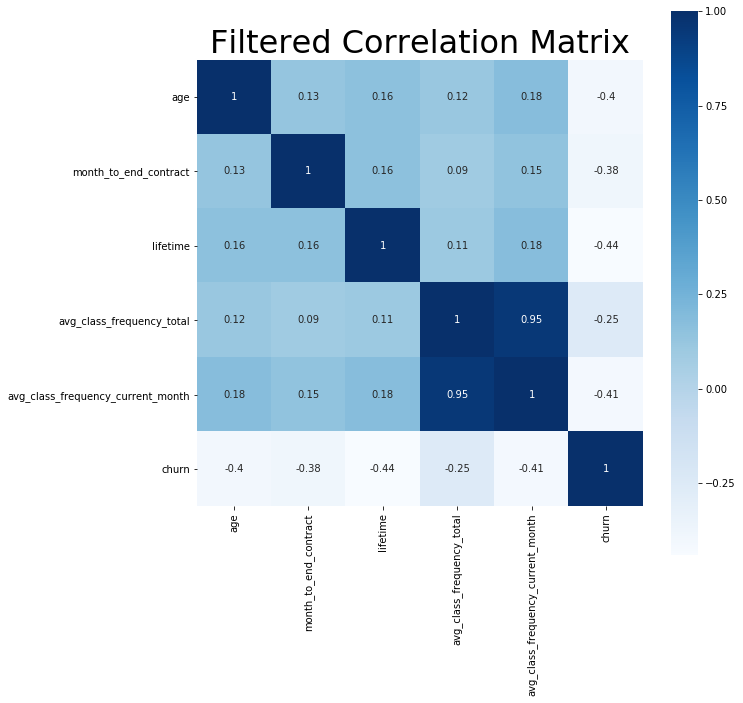

In [8]:
#Удаляем невлиющие признкаки из данных
fc_adj = fc.drop(['gender',
         'phone',
         'near_location',
         'partner',
         'promo_friends',
         'avg_additional_charges_total',
         'group_visits',
         'contract_period'],axis = 1)

#Строим татрицу корреляций для скорректированных данных
corr_matrix = fc_adj.corr().round(2)

#Формат heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True, square = True, cmap="Blues")
plt.title('Filtered Correlation Matrix', fontsize=32)

## Вывод

#### Описание данных:

- Пропущенных значений нет
- Типы данных выбраны верно
- Есть незначительные выбросы в признаках "lifetime" и "avg_additional_charges_total"

#### Влияние на вероятность оттока:

- Время в статусе клиента, длительность абонемента и срок до окончания абонемента у оставшихся клиентов в несколько раз превышает показатели у ушедших клиентов
- Посещаемость оставшихся клиентов выше, чем у ушедших
- Корпоратиыне клиенты и посетители пришедшие по приглашению партнеров реже уходят

#### Вероятность оттока тем ниже, чем выше:

- Частота посещения зала в текущем месяце и за все время
- Время в статусе клиента
- Уровень дополнительных затрат клиента в фитнес-центре
- Возраст клиента

#### Коллинеарность:

Высокая (выше 0.95)

- Длительность контракта и экспирация
- Среднее кол-во посещений в неделю за все время контракта и в текущем месяце

Средняя (около 0.5)

- -Статус партнера и приглешние друга по реферальной схеме

#### Влияние на отток:

Наиболее влияющие (от 0.38)

- Длительность контракта
- Возраст
- Срок до окончания контракта
- Общее время в статусе клиента
- Среднее кол-во посещений в неделю с текущем месяце
- Слабо влияющие признаки (до 0.25)

- Территориальный признак
- Статус партнера
- Пришел ли клиент по рефералу
- Посещал ли группповые занятия
- Выручка от дополнительных услуг
- Среднее кол-во посещений в нед. за все время контракта

Не влияющие признаки (0)

- Пол
- Наличие контактного телефона

#### Подготовка данных: 
- Корректировку типов данных, заполнение пропусков и замену значений на средние не проводили, так как данные этого не требуют 
- Удалили все не влияющие и слабо влиящие призаки для обучения модели


<a id='Шаг 3'></a>
# Шаг 3. Модель прогнозирования оттока клиентов
## Шаг 3.0. Оценка баланса классов

In [9]:
#Посмотрим на долю классов в выборке
print(fc_adj['churn'].value_counts(normalize = True))

#Так как баланс не соблюден, устанавливаем порог для балансировки вероятности класса 
threshold = fc_adj.query('churn == 1')['churn'].count() / fc_adj['churn'].count()

0    0.73475
1    0.26525
Name: churn, dtype: float64


Так как баланс классов не соблюден, в дальнейшем будем делать корректировку на значение порога

## Шаг 3.1. Разобьем данные на обучающую и валидационную выборки и обучим модель логистической регрессией и случайным лесом

In [10]:
#Перед разделением данных выделим из них: целевую переменную (y) и матрицу признаков (x) 
X = fc_adj.drop(['churn'], axis = 1)
y = fc_adj['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0) 

#Поведем стандартизацию данных
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

#Обучаем модель логистической регрессией и создаем массив с предсказаниями
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train_st, y_train)
lr_prediction = lr_model.predict(X_test_st)

#Создаем массив с предсказаниями настроенными вручную
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
custom_lr_prediction = [0 if i< threshold else 1 for i in lr_probabilities]

#Обучаем модель случайным лесом
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_prediction = rf_model.predict(X_test_st)

#Создаем массив с предсказаниями настроенными вручную
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
custom_rf_prediction = [0 if i < threshold else 1 for i in rf_probabilities]

Модели обучены, корректировки на балансы классов внесены

## Шаг 3.2. Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [11]:
#Расчет доли правильных ответов (Accuracy)
lr_acc = accuracy_score(y_test, lr_prediction)
rf_acc = accuracy_score(y_test, rf_prediction)
lr_acc_cus = accuracy_score(y_test, custom_lr_prediction)
rf_acc_cus = accuracy_score(y_test, custom_rf_prediction)

#Расчет доли правильных ответов только среди целевого класса (Precision)
lr_precision = precision_score(y_test, lr_prediction)
rf_precision = precision_score(y_test, rf_prediction)
lr_precision_cus = precision_score(y_test, custom_lr_prediction)
rf_precision_cus = precision_score(y_test, custom_rf_prediction)

#Расчет полноты (Recall)
lr_recall = recall_score(y_test, lr_prediction)
rf_recall = recall_score(y_test, rf_prediction)
lr_recall_cus = recall_score(y_test, custom_lr_prediction)
rf_recall_cus = recall_score(y_test, custom_rf_prediction)

#Расчет балансирующей метрики (F1)
lr_f1 = f1_score(y_test, lr_prediction)
rf_f1 = f1_score(y_test, rf_prediction)
lr_f1_cus = f1_score(y_test, custom_lr_prediction)
rf_f1_cus = f1_score(y_test, custom_rf_prediction)

print('Logistic Regression:        Аccuracy {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 Score {:.3f}'.format(lr_acc,lr_precision,lr_recall,lr_f1))
print('Logistic Regression Custom: Аccuracy {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 Score {:.3f}'.format(lr_acc_cus,lr_precision_cus,lr_recall_cus,lr_f1_cus))
print('Random Forest:              Accuracy {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 Score {:.3f}'.format(rf_acc,rf_precision,rf_recall,rf_f1))
print('Random Forest Custom:       Аccuracy {:.3f}, Precision {:.3f}, Recall {:.3f}, F1 Score {:.3f}'.format(rf_acc_cus,rf_precision_cus,rf_recall_cus,rf_f1_cus))

Logistic Regression:        Аccuracy 0.929, Precision 0.879, Recall 0.849, F1 Score 0.864
Logistic Regression Custom: Аccuracy 0.902, Precision 0.768, Recall 0.903, F1 Score 0.830
Random Forest:              Accuracy 0.933, Precision 0.888, Recall 0.855, F1 Score 0.871
Random Forest Custom:       Аccuracy 0.914, Precision 0.779, Recall 0.949, F1 Score 0.855


## Вывод:

Модель обученая случайным лесом предсказывает лучше, даже после учета корректировки на баланс классов ее доля правильных ответов составляет более 90%. При этом по всем остальным показателям случайный лес впереди. 

- Доля верно предсказанного оттока из реального оттока - около 78%, это значит что критично для нас мы будем ошибаться только в 22% (предсказать, что клиент не уйдет, когда в реальность будет отток)

- Доля верно предсказанного оттока из всех правильных предсказаний около 95% 

- Балансирующая метрика показывает, что и тут случайный лес впереди

<a id='Шаг 4'></a>
## Шаг 4. Кластеризация клиентов

## Шаг 4.1. Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. 

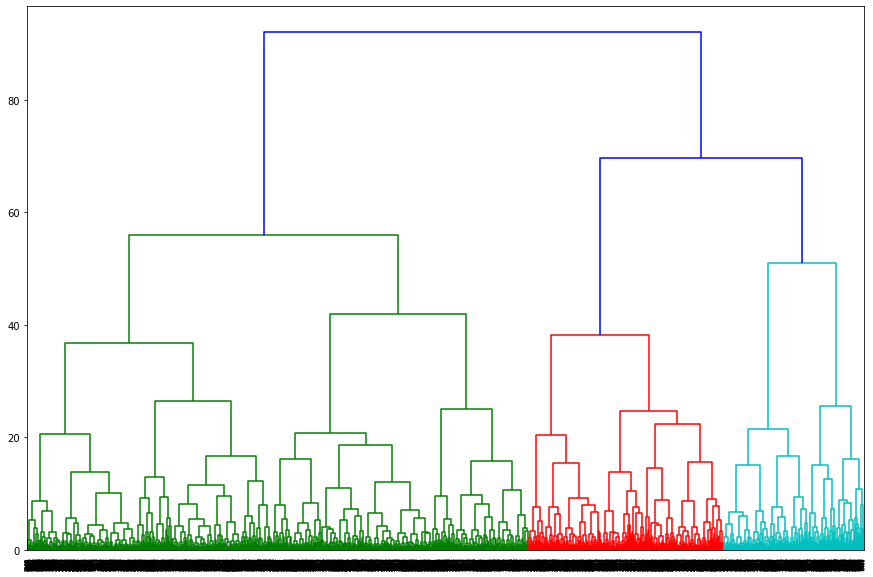

In [12]:
#Стандартизация данных
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

#Строим дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Из дендограмы видим, что все данные можно поделить на 3 кластера

## Шаг 4.2. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Посмотрим на средние значения признаков для кластеров.

In [13]:
#Обучим модель кластеризации K-Means
km = KMeans(n_clusters = 5, random_state = 0) 
labels = km.fit_predict(X_sc)

#Добавим столбец с номером кластера к общей таблице и посмотрим на средние значения по кластерам
fc_adj['labels']  = labels
cluster = fc_adj.groupby('labels').mean().T
cluster.columns = cluster.columns.astype('str')

#Форматирование таблицы
format_dict = {'0': '{:.2f}','1': '{:.2f}','2': '{:.2f}','3': '{:.2f}','4': '{:.2f}'}
cluster\
.style\
.format(format_dict)\
.background_gradient(subset=['0','1','2','3','4'], cmap='Blues', axis = 1)\
.set_properties(**{'width': '100px'})

labels,0,1,2,3,4
age,29.81,25.68,30.15,29.68,31.21
month_to_end_contract,4.90,1.81,4.03,10.95,2.19
lifetime,12.72,1.64,3.62,3.68,2.77
avg_class_frequency_total,2.01,1.39,3.04,1.65,1.25
avg_class_frequency_current_month,2.02,1.07,3.03,1.64,1.12
churn,0.00,0.71,0.06,0.03,0.29


#### Вывод

Исходя из таблицы можно сделать предположения, по каким признаками прошла кластеризация. 
- Кластер 0 - по продолжительности в статусе клиента 
- Кластер 1 - самые низкие показатели по всем признакам
- Кластер 2 - по количеству посещений
- Кластер 3 - по экспирации абонемента
- Кластер 4 - по возрасту (средний возраст более 30 лет)

## Шаг 4.3. Построим распределения признаков для кластеров

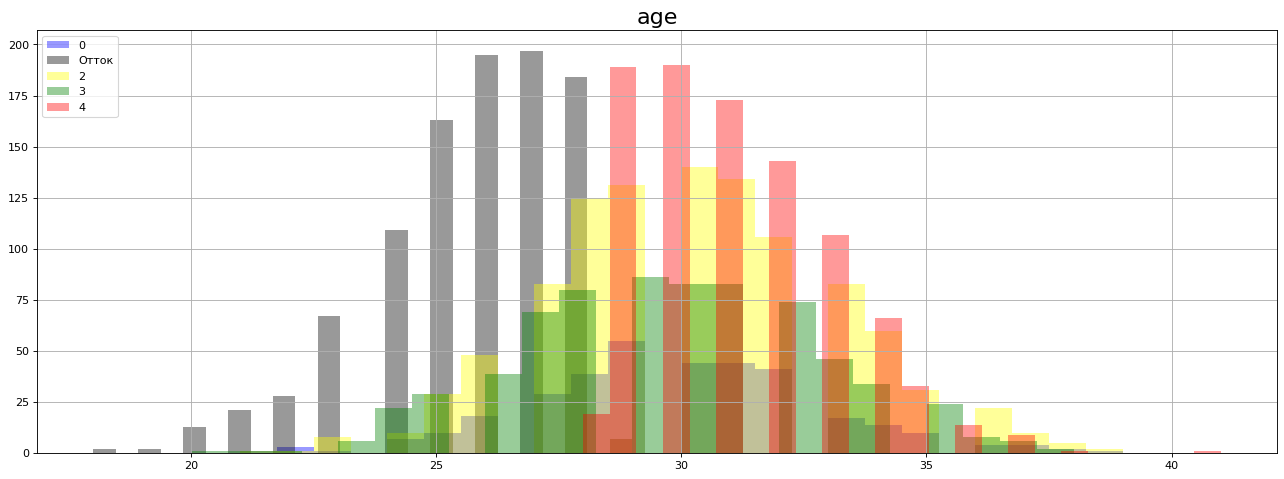

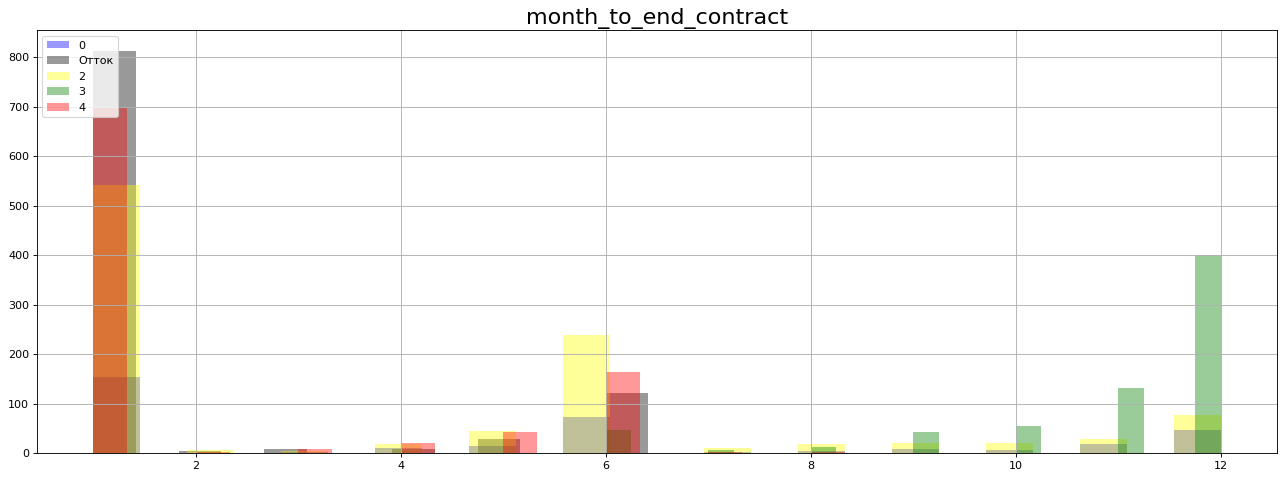

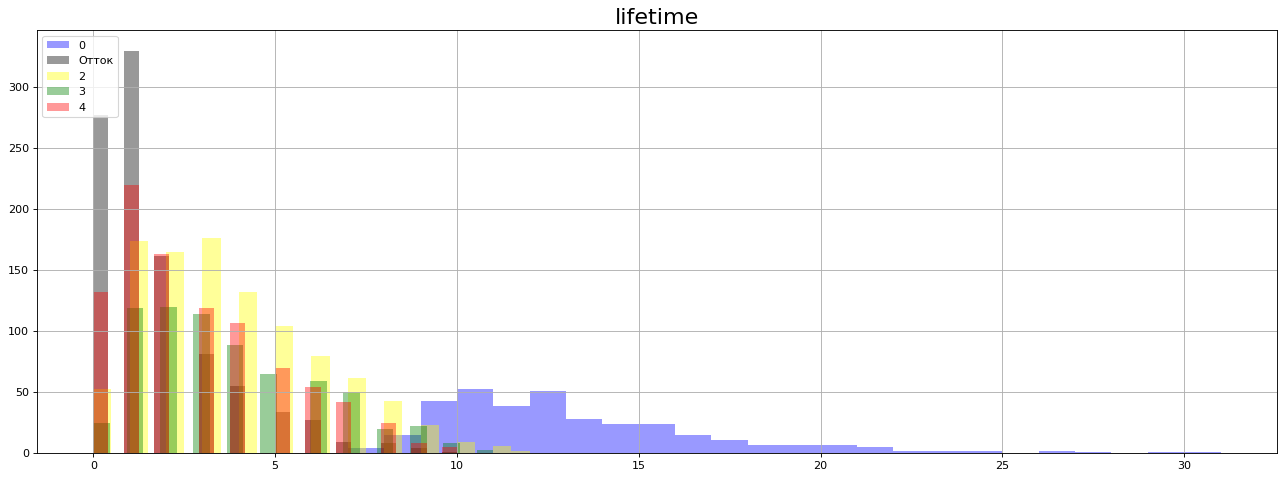

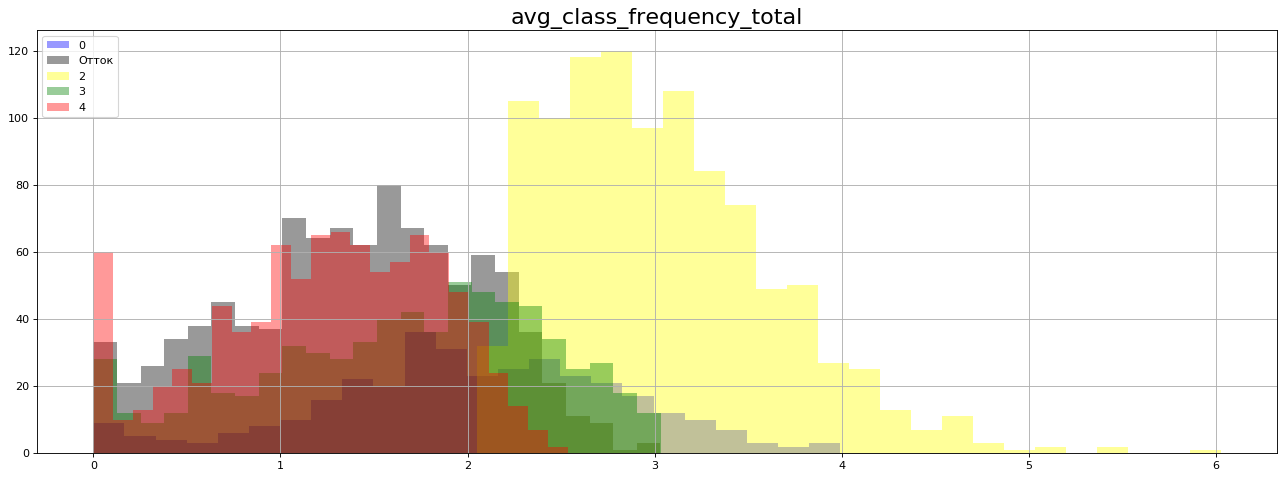

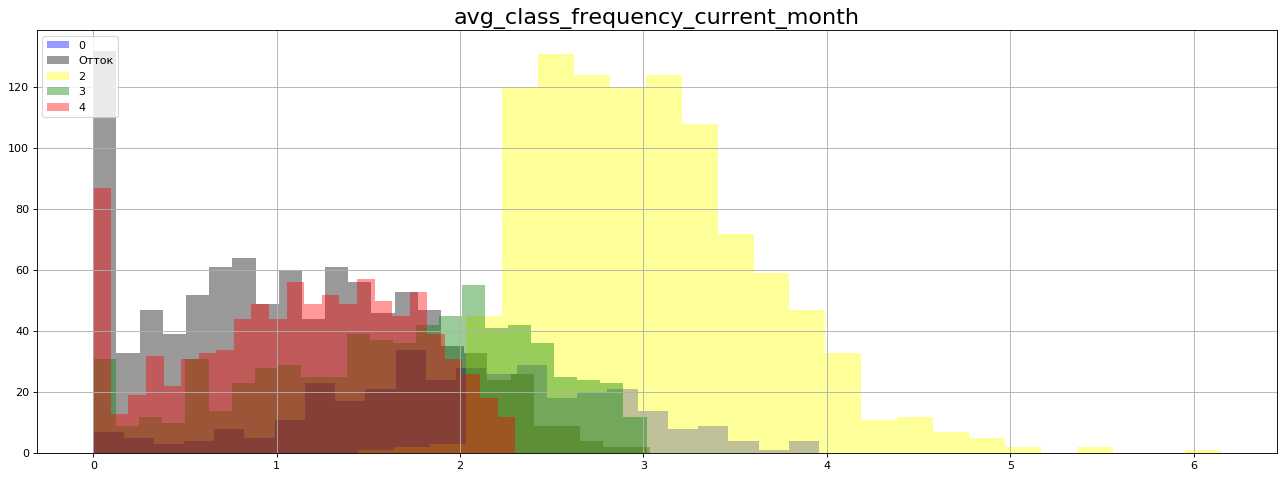

In [14]:
#Разбиваем данные на churn и нет
fc_adj2 = fc_adj.drop(['churn'], axis = 1)

fc_adj_0 = fc_adj2.query('labels == 0').drop(['labels'],axis = 1)
fc_adj_1 = fc_adj2.query('labels == 1').drop(['labels'],axis = 1)
fc_adj_2 = fc_adj2.query('labels == 2').drop(['labels'],axis = 1)
fc_adj_3 = fc_adj2.query('labels == 3').drop(['labels'],axis = 1)
fc_adj_4 = fc_adj2.query('labels == 4').drop(['labels'],axis = 1)

#Строим гистогамы через цикл
for feature in fc_adj_0.columns:
    plt.figure(figsize=(20,7), dpi= 80)
    sns.distplot(fc_adj_0[feature], bins = 24, kde = False, label="0", color = 'blue')
    sns.distplot(fc_adj_1[feature], bins = 24, kde = False, label="Отток", color = 'black')
    sns.distplot(fc_adj_2[feature], bins = 24, kde = False, label="2", color = 'yellow')
    sns.distplot(fc_adj_3[feature], bins = 24, kde = False, label="3", color = 'green')
    sns.distplot(fc_adj_4[feature], bins = 24, kde = False, label="4", color = 'red')
    plt.legend(loc = 2)
    plt.grid()
    plt.title(feature, fontsize=20)
    plt.ylabel("")
    plt.xlabel("")
    plt.show() 

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


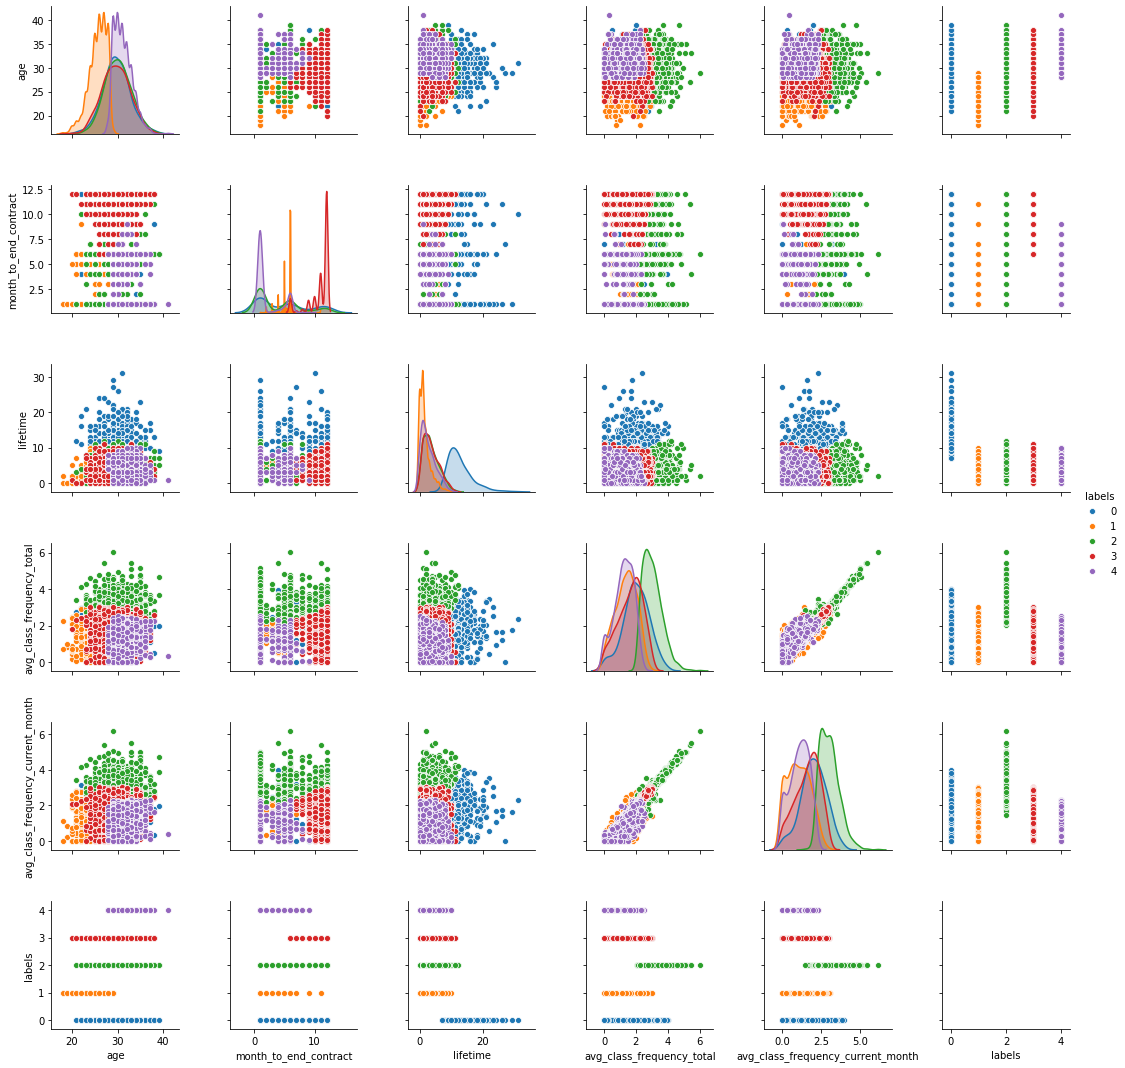

In [15]:
sns.pairplot(fc_adj2, hue="labels")

#### Вывод

Исходя из графиков можно видим, что наши предполождения подтвердились кластеризация прошла по следующим признакам:  
- Кластер 0 - по продолжительности в статусе клиента (от 7м)
- Кластер 1 - по возрасту (до 30 лет)
- Кластер 2 - по количеству посещений
- Кластер 3 - по экспирации абонемента
- Кластер 4 - возраст клиента более 30 лет

## Шаг 4.4. Для каждого полученного кластера посчитаем долю оттока

In [16]:
fc_adj['labels']  = labels
fc_adj.groupby('labels')['churn'].mean().round(2)

labels
0    0.00
1    0.71
2    0.06
3    0.03
4    0.29
Name: churn, dtype: float64

#### Вывод:

- Посетители попавшие в кластер 1 - с вероятностью более 70% перестануть являться нашими клиентами
- Стоит обратить внимание на кластер 4 - вероятность почти 30%, возможно стоит проанализировать этот кластер тщательнее и принять какие-то меры.

<a id='Шаг 5'></a>
# Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

## Выводы
В кластер с самой высокой вероятностью оттока попадают посетители, которые: 
 - до 30 лет
 - среднее количество посещений менее 2 раз в неделю (за все время)
 - среднее количество посещений менее 2 раз в неделю (в текущем месяце) 
 - являются нашими клиентами менее 2 месяцев
 - до окончания абонемента остается менее 2 месяцев

## Рекомендации: 

 - Сделать простарнство фитнесс центра более привлекательное для соц сетей (например Instagram) что подтянет молодежь,скорее больше молодых девушек, которые в свою очередь будут привлекать больше молодых людей и отток посетителей до 30 лет снизится
 - Условия рассрочки или абонемента в кредит
 - Предлагать за два месяца до окончания абонемента условия продления абонемента на выгодных условиях (скидка за продление)
 - Предлагать больше бесплатных групповых занятий для клиентов, чтобы увеличить их среднее количество посещений в неделю
 - Мониторить клиентов, отсутствующих какое-то время и присылать им напоминание
 - Добавить опцию сменить зал (если сеть), в случае, если клиент переехал и ему не удобно добираться

 
 **Со всех посетителей попавших в отток попробовать взять отзыв, чтобы обнаружить слабые места!!!**
 